In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

In [3]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [4]:
batch_size = 50
learning_rate = 0.25

In [5]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [6]:
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A), 1))

loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [7]:
init = tf.global_variables_initializer()
sess.run(init)

optimize = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = optimize.minimize(loss)

In [8]:
loss_vec = []

for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    fd = {
        x_data: rand_x,
        y_target: rand_y,
    }
    sess.run(train_step, feed_dict=fd)
    
    temp_loss = sess.run(loss, feed_dict=fd)
    loss_vec.append(temp_loss)
    
    if (i+1)%100 == 0:
        print('Step #{} A={} b={}'.format(i+1, sess.run(A), sess.run(b)))
        print('Loss = {}'.format(temp_loss))

Step #100 A=[[3.3387365]] b=[[1.3705893]]
Loss = 0.3975529074668884
Step #200 A=[[2.853079]] b=[[2.0524113]]
Loss = 0.43560072779655457
Step #300 A=[[2.2808783]] b=[[2.8724904]]
Loss = 0.37388062477111816
Step #400 A=[[1.3744183]] b=[[4.0788245]]
Loss = 0.32610347867012024
Step #500 A=[[1.0589874]] b=[[4.561884]]
Loss = 0.2872658967971802
Step #600 A=[[1.0233291]] b=[[4.580726]]
Loss = 0.28909850120544434
Step #700 A=[[1.0647585]] b=[[4.5622153]]
Loss = 0.29714450240135193
Step #800 A=[[0.931997]] b=[[4.68612]]
Loss = 0.2171696126461029
Step #900 A=[[1.0954757]] b=[[4.641025]]
Loss = 0.2371606081724167
Step #1000 A=[[1.0645778]] b=[[4.574062]]
Loss = 0.29238036274909973
Step #1100 A=[[0.99114084]] b=[[4.622922]]
Loss = 0.2977540194988251
Step #1200 A=[[0.9843126]] b=[[4.659387]]
Loss = 0.21062655746936798
Step #1300 A=[[0.95603454]] b=[[4.5894766]]
Loss = 0.2543197274208069
Step #1400 A=[[1.0233027]] b=[[4.6036468]]
Loss = 0.24973337352275848
Step #1500 A=[[1.0067434]] b=[[4.6845684]]


In [9]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)

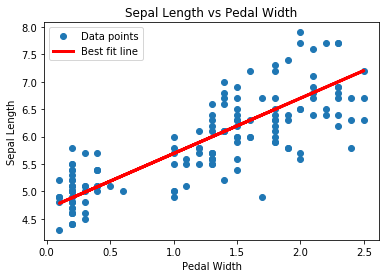

In [10]:
plt.plot(x_vals, y_vals, 'o', label='Data points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
